#### Instructions

From bootstrap replicates from residual data, reverse-engineer the decomposition process to reach the forecast values in the data.

1. From the given residual data, generate `100` sets of `14` bootstrap replicates.
2. For each set in the replicates:
    - Compute for the next `14` average values in the MA(18) process (next values in `ma_data`). The next average value is computed through the average of the last 18 residual values, including the bootstrapped value.
    - Get the element-wise sum between the (first) `14` computed average values and the `14` bootstrap replicates to get the next `14` values in `diff_data`
    - Compute for the cumulative sum in `diff_data` to get the forecasted price.
    - Plot a forecast line on the computed forecast price.

3. With the 100 forecast lines on the plot, create another plot that only shows the highest, the lowest, and the average forecasted value for each day.


In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
num_replicates = 100
num_samples = 14


resid_data = np.random.randn(1000)
conv_array = np.ones(18) / 18

In [183]:
bootstrap_replicates = np.zeros((num_replicates, num_samples))
for i in range(num_replicates):
    bootstrap_sample = np.random.choice(resid_data, size=num_samples, replace=True)
    bootstrap_replicates[i] = bootstrap_sample

In [184]:
forecast_prices = np.zeros((num_replicates, num_samples))
for i in range(num_replicates):
    next_ma_values = np.convolve(np.append(resid_data[-18:], bootstrap_replicates[i]), conv_array, mode='valid')[:num_samples]
    next_diff_data = next_ma_values + bootstrap_replicates[i]
    forecast_prices[i] = np.cumsum(next_diff_data)

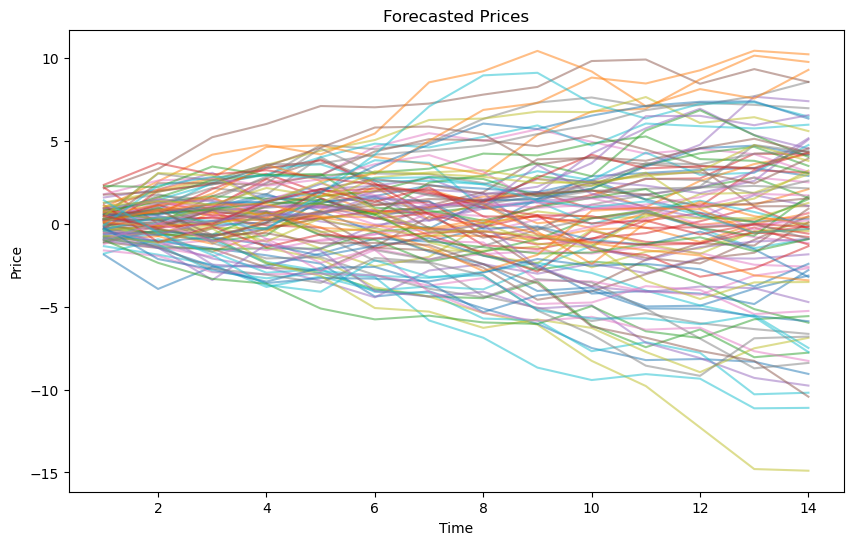

In [185]:
plt.figure(figsize=(10, 6))
for i in range(len(forecast_prices)):
    plt.plot(np.arange(1, len(forecast_prices[i]) + 1), forecast_prices[i], alpha=0.5)
plt.title('Forecasted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [186]:
highest_forecast = np.max(forecast_prices, axis=0)
lowest_forecast = np.min(forecast_prices, axis=0)
average_forecast = np.mean(forecast_prices, axis=0)

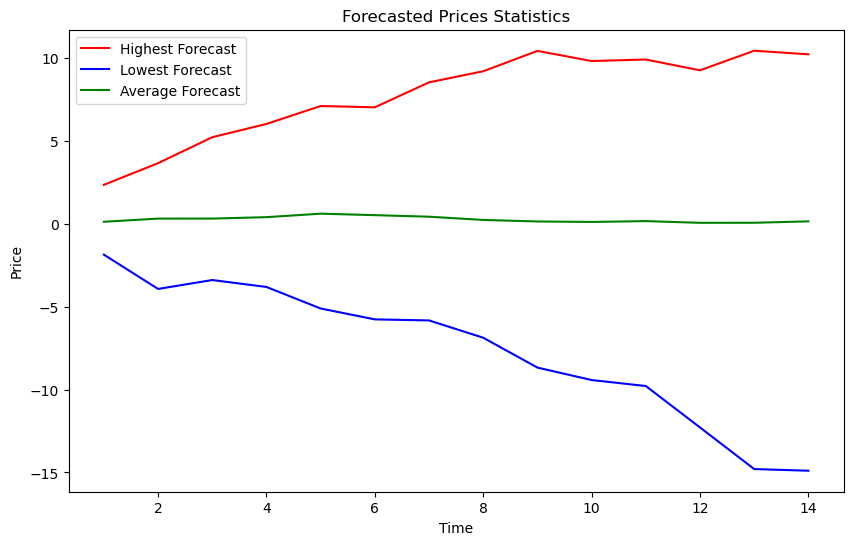

In [187]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(highest_forecast) + 1), highest_forecast, label='Highest Forecast', color='red')
plt.plot(np.arange(1, len(lowest_forecast) + 1), lowest_forecast, label='Lowest Forecast', color='blue')
plt.plot(np.arange(1, len(average_forecast) + 1), average_forecast, label='Average Forecast', color='green')

plt.title('Forecasted Prices Statistics')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Continuation Task

In [188]:
actual_data = pd.read_csv('actual_values_forecast.csv')
actual_values = actual_data['close'].values

In [189]:
actual_values = actual_values.reshape(1, -1)

In [190]:
forecast_errors = forecast_prices - actual_values
mse = np.mean(forecast_errors**2, axis=0)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(forecast_errors), axis=0)

In [191]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): [40206707.30510622 40324082.83645003 40128338.85309368 41233970.16003767
 40993266.66332538 41563644.61993656 42257559.89985153 41027436.52444038
 40003971.92367029 40312567.96885359 40416375.21754292 39916496.73050746
 39198340.31633514 31312684.18140018]
Root Mean Squared Error (RMSE): [6340.87590993 6350.12463157 6334.69327222 6421.36824672 6402.59843058
 6446.98725142 6500.58150475 6405.26631175 6324.86932068 6349.21790214
 6357.38745221 6317.95035834 6260.85779397 5595.77377861]
Mean Absolute Error (MAE): [6340.87585116 6350.12448613 6334.69302649 6421.36789303 6402.59797605
 6446.9866984  6500.58079488 6405.26543684 6324.86823568 6349.2166298
 6357.38597449 6317.94868366 6260.85583979 5595.77150321]


# Additional

Dummy forecast next to the actual forecast

In [194]:
forecast_dates = actual_dates
forecast_prices = np.random.randint(6000, 6500, size=len(actual_dates))

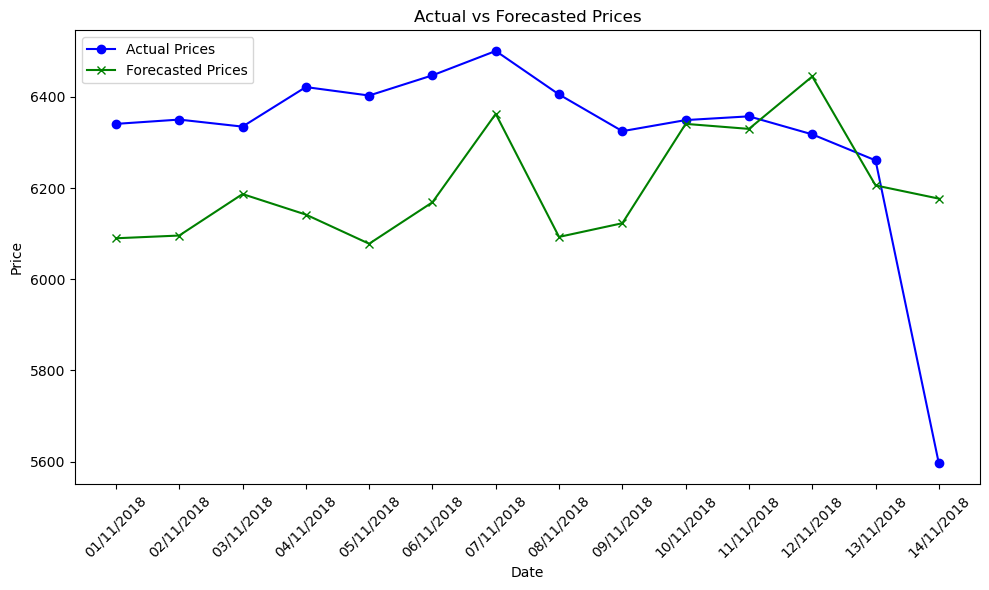

In [195]:
plt.figure(figsize=(10, 6))
plt.plot(actual_dates, actual_prices, label='Actual Prices', color='blue', marker='o')
plt.plot(forecast_dates, forecast_prices, label='Forecasted Prices', color='green', marker='x')
plt.title('Actual vs Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()